In [1]:
!pip install folium

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [3]:
api_key = "fb365aa6104829b44455572365ff3b4e"

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "Delhi"
params = {
"q": city_name,
"appid": api_key,
"units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

In [5]:
response

<Response [200]>

In [6]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1723485600,
   'main': {'temp': 29.19,
    'feels_like': 35.74,
    'temp_min': 29.19,
    'temp_max': 31.48,
    'pressure': 1001,
    'sea_level': 1001,
    'grnd_level': 977,
    'humidity': 82,
    'temp_kf': -2.29},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}],
   'clouds': {'all': 63},
   'wind': {'speed': 2.53, 'deg': 118, 'gust': 3.48},
   'visibility': 10000,
   'pop': 0.27,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-08-12 18:00:00'},
  {'dt': 1723496400,
   'main': {'temp': 29.37,
    'feels_like': 34.85,
    'temp_min': 29.37,
    'temp_max': 30.03,
    'pressure': 1001,
    'sea_level': 1001,
    'grnd_level': 977,
    'humidity': 76,
    'temp_kf': -0.66},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}],
   'clouds': {'all': 40},
   'wind': {'speed': 2.92, 'deg': 86, 'gust': 4.58},
   'visib

In [7]:
# Extract relevant weather attributes and timestamps
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

In [8]:
weather_data

[{'dt': 1723485600,
  'main': {'temp': 29.19,
   'feels_like': 35.74,
   'temp_min': 29.19,
   'temp_max': 31.48,
   'pressure': 1001,
   'sea_level': 1001,
   'grnd_level': 977,
   'humidity': 82,
   'temp_kf': -2.29},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'clouds': {'all': 63},
  'wind': {'speed': 2.53, 'deg': 118, 'gust': 3.48},
  'visibility': 10000,
  'pop': 0.27,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-08-12 18:00:00'},
 {'dt': 1723496400,
  'main': {'temp': 29.37,
   'feels_like': 34.85,
   'temp_min': 29.37,
   'temp_max': 30.03,
   'pressure': 1001,
   'sea_level': 1001,
   'grnd_level': 977,
   'humidity': 76,
   'temp_kf': -0.66},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'clouds': {'all': 40},
  'wind': {'speed': 2.92, 'deg': 86, 'gust': 4.58},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-08-12 21:00:00'},
 

In [9]:
# Convert timestamps to pandas datetime objects
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [10]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

In [11]:
# Convert the "Datetime" column to a DatetimeIndex
weather_df.set_index("Datetime", inplace=True)

In [12]:
weather_df


,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-08-12 18:00:00,1723485600,29.19,82,2.53,broken clouds
2024-08-12 21:00:00,1723496400,29.37,76,2.92,scattered clouds
2024-08-13 00:00:00,1723507200,28.99,73,2.92,light rain
2024-08-13 03:00:00,1723518000,31.13,64,3.16,light rain
2024-08-13 06:00:00,1723528800,35.32,47,2.98,few clouds
2024-08-13 09:00:00,1723539600,34.91,49,2.56,light rain
2024-08-13 12:00:00,1723550400,34.59,50,1.24,light rain
2024-08-13 15:00:00,1723561200,33.81,54,2.38,overcast clouds
2024-08-13 18:00:00,1723572000,32.89,58,2.84,overcast clouds


In [13]:


# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
  rain = entry.get("rain", {}).get("3h", 0)
  snow = entry.get("snow", {}).get("3h", 0)
  total_precipitation = rain + snow
  precipitation.append(total_precipitation)

In [14]:
precipitation

[0,
 0,
 1.81,
 0.49,
 0,
 0.58,
 0.25,
 0,
 0,
 0,
 1.97,
 0.52,
 0.3,
 0.14,
 0,
 0.34,
 0.31,
 3.81,
 1.12,
 0.44,
 0,
 0,
 0.1,
 0.48,
 0,
 5.39,
 6.62,
 7.69,
 0.75,
 2.81,
 1.06,
 0,
 0,
 4.09,
 1.64,
 0,
 0,
 1.2,
 1.86,
 2.97]

In [15]:
# Step 5: Perform data modeling
avg_temp = sum(temperatures) / len(temperatures)
avg_temp

31.75575

In [16]:
max_temp = max(temperatures)
max_temp

37.86

In [17]:
min_temp = min(temperatures)
min_temp

27.54

In [18]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

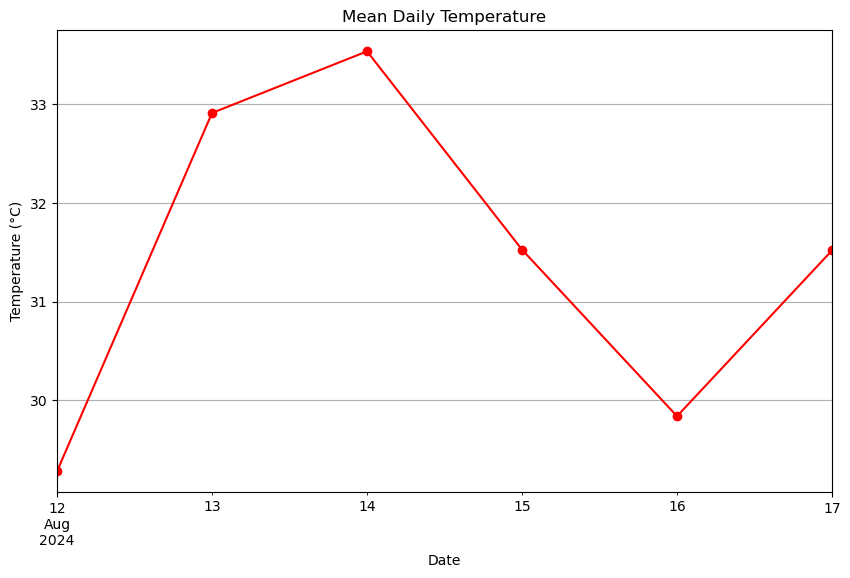

In [19]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

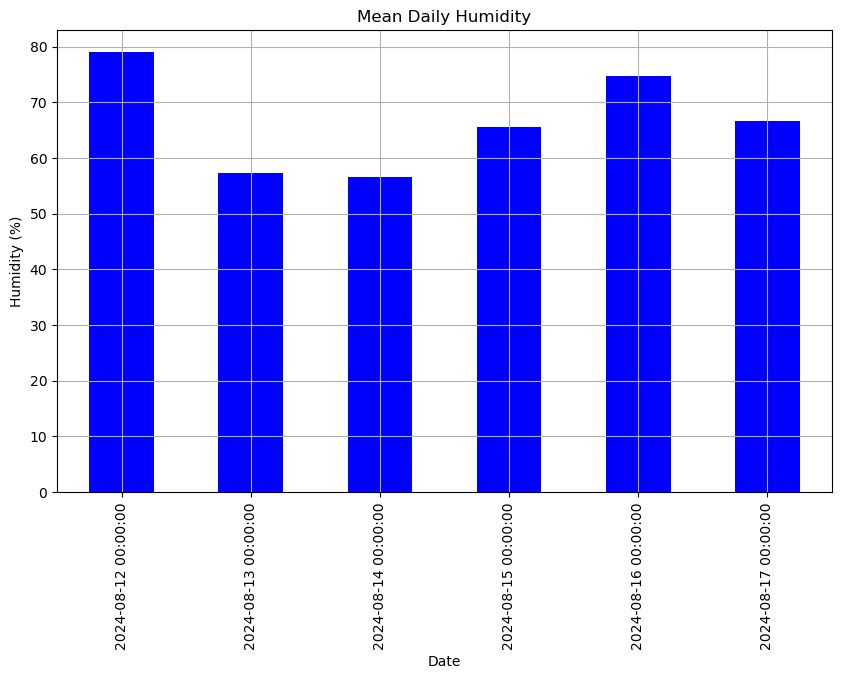

In [20]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

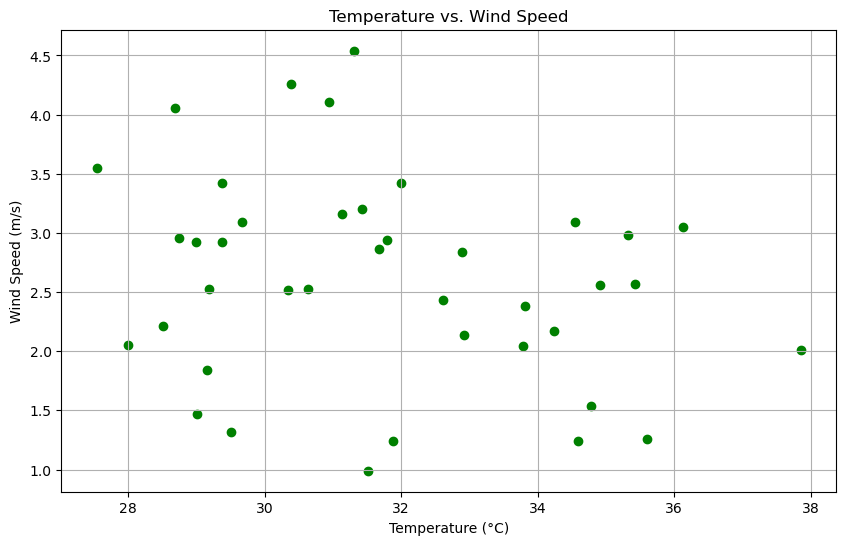

In [21]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

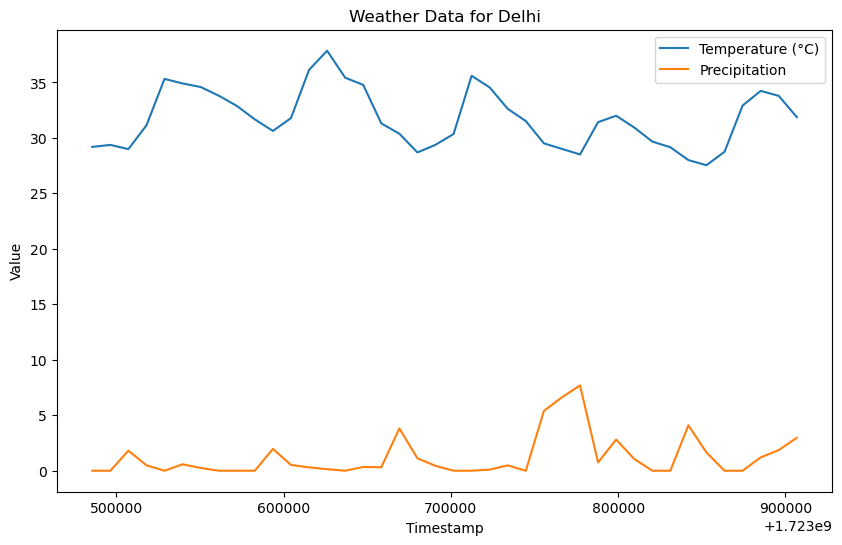

In [22]:
# Step 6: Visualize the weather data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()

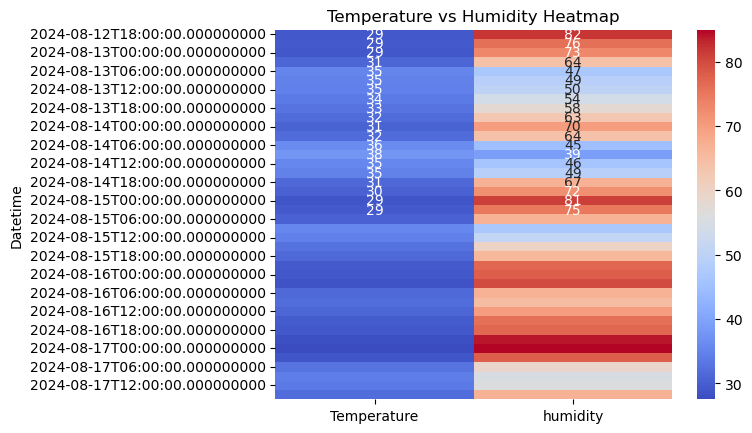

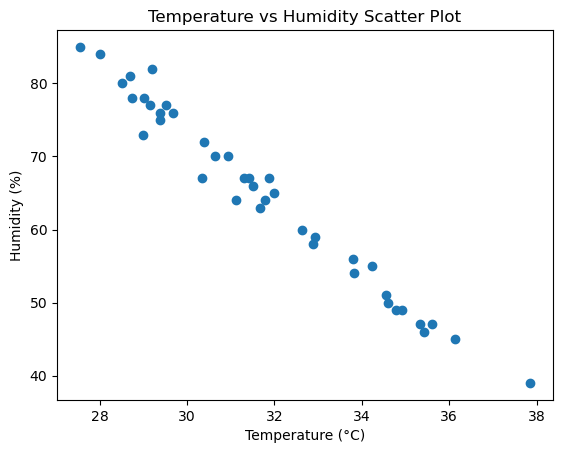

In [23]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()
# Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()